# Dataset Analysis: Player Legend Statistics

This notebook analyzes player performance statistics for various Legends from a gaming dataset. Each legend falls into specific categories: **Assault**, **Skirmisher**, **Support**, **Controller**, and **Recon**.


## 2. Data Import and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## 3. Load and Combine Datasets

In [2]:
# Define legend categories
legend_categories = {
    'Assault': ['Bangalore', 'Fuse', 'Ash', 'Mad Maggie', 'Ballistic'],
    'Skirmisher': ['Pathfinder', 'Wraith', 'Octane', 'Revenant', 'Horizon', 'Valkyrie','Alter'],
    'Recon': ['Bloodhound', 'Crypto', 'Seer', 'Vantage'],
    'Support': ['Gibraltar', 'Lifeline', 'Mirage', 'Loba', 'Newcastle', 'Conduit'],
    'Controller': ['Caustic', 'Wattson', 'Rampart', 'Catalyst']
}

# Flatten the dictionary to map legend to category
legend_to_category = {}
for category, legends in legend_categories.items():
    for legend in legends:
        legend_to_category[legend] = category


In [3]:

base_path = r"C:\Users\Me\Documents\GitHub\Apex-Legends-Dataset\Legend Stats Dataset\Processed_Legend_Stats"
#change this code to now take in player_name as a variable
damage_path = os.path.join(base_path, 'Legend Damage')
kills_path = os.path.join(base_path, 'Legend Kills')
matches_path = os.path.join(base_path, 'Legend Matches Played')
wins_path = os.path.join(base_path, 'Legend Wins')
# Function to list files in a directory
def list_files(directory):
    print(f"Files in {directory}:")
    for f in os.listdir(directory):
        print(f)


# Initialize an empty list to hold dataframes for each legend
legend_dataframes = []

# Get list of legends
legends = list(legend_to_category.keys())


In [4]:

#Loop over each legend
for legend in legends:
    try:
        # Build file paths for the legend
        legend_damage_file = os.path.join(damage_path, f"{legend}_damage.csv")
        legend_kills_file = os.path.join(kills_path, f"{legend}_kills.csv")
        legend_matches_file = os.path.join(matches_path, f"{legend}_games_played.csv")  # Updated suffix
        legend_wins_file = os.path.join(wins_path, f"{legend}_wins.csv")
        
        # Check if all files exist
        required_files = [legend_damage_file, legend_kills_file, legend_matches_file, legend_wins_file]
        missing_files = [f for f in required_files if not os.path.exists(f)]
        if missing_files:
            print(f"Data files for legend '{legend}' are missing: {missing_files}. Skipping this legend.")
            continue  # Skip to the next legend if any file is missing
        
        # Read the data files
        df_damage = pd.read_csv(legend_damage_file, header=None, names=['Damage'], skiprows=1)
        df_matches = pd.read_csv(legend_matches_file, header=None, names=['Games Played'], skiprows=1)
        df_wins = pd.read_csv(legend_wins_file, header=None, names=['Wins'], skiprows=1)

        # Custom converter to handle numeric values and ignore non-numeric ones
        def convert_number(s):
            try:
                # Remove commas and quotes, then convert to integer
                return int(str(s).replace(',', '').replace('"', '').strip())
            except ValueError:
                # Return NaN if conversion fails
                return pd.NA

        # Read the kills CSV file with the custom converter
        df_kills = pd.read_csv(legend_kills_file, header=None, names=['Kills'], converters={0: convert_number}, skiprows=1)

        # Combine the data into a single DataFrame, aligning on index (axis=1)
        df_legend = pd.concat([df_damage.reset_index(drop=True), 
                               df_kills.reset_index(drop=True), 
                               df_matches.reset_index(drop=True), 
                               df_wins.reset_index(drop=True)], axis=1)

        # Add 'legend_name' column to identify the legend in the combined DataFrame
        df_legend['legend_name'] = legend

        # Append the processed DataFrame to the list
        legend_dataframes.append(df_legend)
    
    except Exception as e:
        # Catch any exceptions during processing and print the error
        print(f"An error occurred while processing legend '{legend}': {e}")



In [5]:
# Concatenate all legend dataframes
all_legends_df = pd.concat(legend_dataframes, ignore_index=True)
# Map legends to categories
all_legends_df['Legend_Category'] = all_legends_df['legend_name'].map(legend_to_category)
# # List of legends with missing Wins data
#legends_missing_wins = ['Ballistic', 'Conduit', 'Alter', 'Newcastle']
# Filter out legends with missing Wins data
#all_legends_df = all_legends_df[~all_legends_df['legend_name'].isin(legends_missing_wins)]
all_legends_df
# create the output file path and create the file if it does not exist
output_file = os.path.join(base_path, 'all_legends_combined.csv')
# Save the combined DataFrame to a CSV file
all_legends_df.to_csv(output_file, index=False)


##  4. Data Cleaning and Preparation

In [6]:
# Check missing values
print(all_legends_df.isnull().sum())

# Drop rows with missing data
all_legends_df_clean = all_legends_df.dropna()

# Verify no missing values
print("\nAfter cleaning:\n", all_legends_df_clean.isnull().sum())

# Check for duplicates
duplicates = all_legends_df[all_legends_df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")
if not duplicates.empty:
    print(duplicates)

# Remove duplicates
all_legends_df = all_legends_df.drop_duplicates()


Damage                0
Kills                 0
Games Played          0
Wins               2000
legend_name           0
Legend_Category       0
dtype: int64

After cleaning:
 Damage             0
Kills              0
Games Played       0
Wins               0
legend_name        0
Legend_Category    0
dtype: int64

Number of duplicate rows: 0


## Dataset Composition Insights

In [7]:
print("Dataset size:", all_legends_df.shape)
print("Number of Legends:", all_legends_df['Legend_Category'].nunique())
print("\nCategory Distribution:\n", all_legends_df['Legend_Category'].value_counts(normalize=True)*100)

Dataset size: (13000, 6)
Number of Legends: 5

Category Distribution:
 Skirmisher    26.923077
Support       23.076923
Assault       19.230769
Recon         15.384615
Controller    15.384615
Name: Legend_Category, dtype: float64


### Bar Graphs for Metrics per Legend

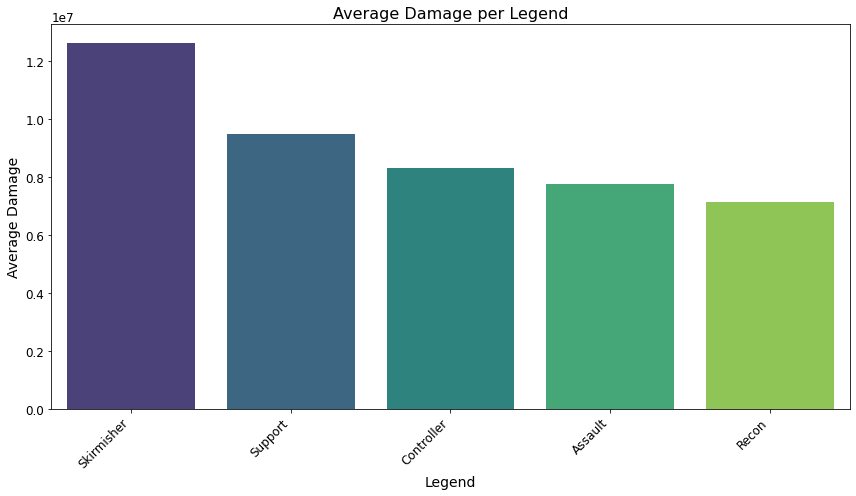

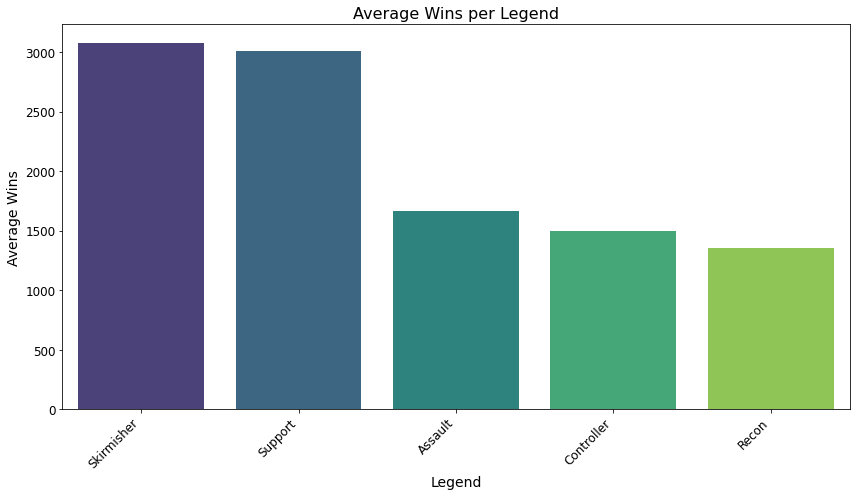

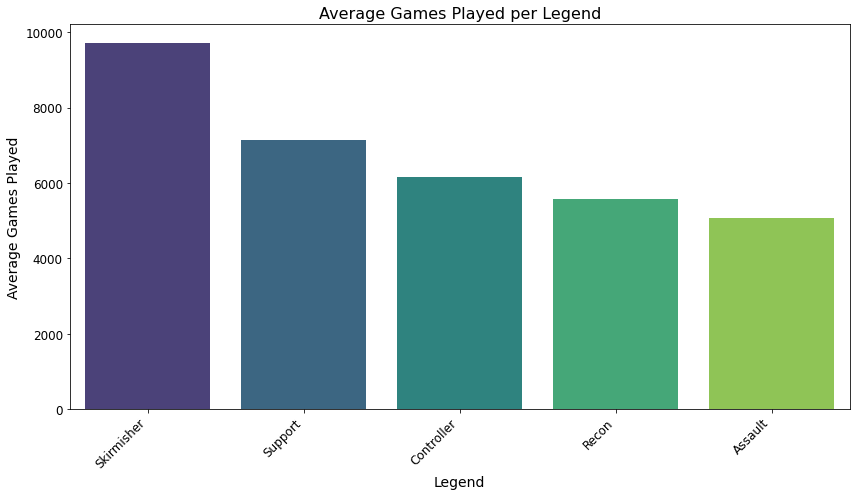

In [8]:
# Metrics to plot
metrics = ['Damage', 'Wins', 'Games Played']

# Set larger font sizes globally
plt.rcParams.update({'axes.labelsize': 14, 'axes.titlesize': 16, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

for metric in metrics:
    plt.figure(figsize=(12, 7))
    
    # Aggregate data by Legend (mean values clearly shown)
    legend_avg = all_legends_df.groupby('Legend_Category')[metric].mean().sort_values(ascending=False)
    
    sns.barplot(x=legend_avg.index, y=legend_avg.values, palette='viridis')

    # Clear and readable labels
    plt.title(f'Average {metric} per Legend')
    plt.xlabel('Legend')
    plt.ylabel(f'Average {metric}')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


##  5. Exploratory Data Analysis (EDA)

### Basic statistical summary

In [9]:
all_legends_df.describe()

,Damage,Games Played
count,1.300000e+04,13000.000000
mean,9.470831e+06,7044.839385
std,1.372018e+07,5695.409127
min,4.450920e+05,239.000000
25%,4.162626e+06,2518.000000
50%,8.402206e+06,5927.500000
75%,1.315137e+07,10115.000000
max,1.335473e+09,55617.000000


### Data distribution

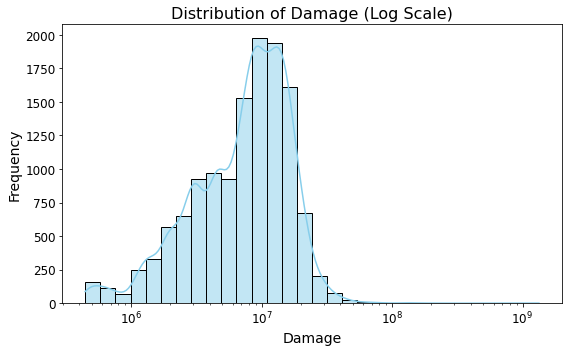

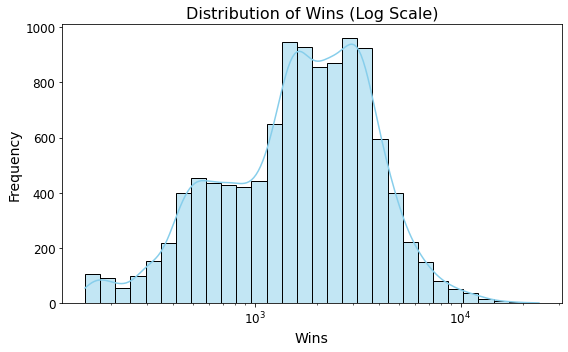

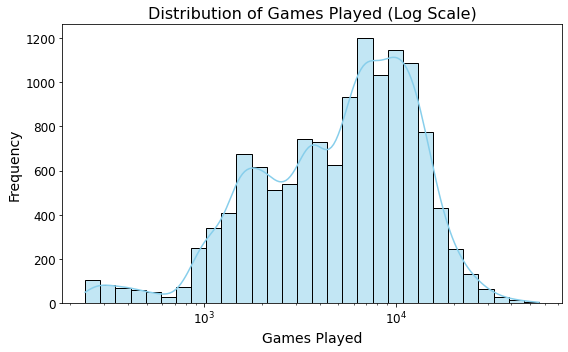

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase global font sizes
plt.rcParams.update({
    'axes.labelsize': 14, 
    'axes.titlesize': 16, 
    'xtick.labelsize': 12, 
    'ytick.labelsize': 12
})

# Metrics to plot
metrics = ['Damage', 'Wins', 'Games Played']

for col in metrics:
    plt.figure(figsize=(8, 5))
    sns.histplot(all_legends_df[col], kde=True, log_scale=True, bins=30, color='skyblue')

    plt.title(f'Distribution of {col} (Log Scale)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



### Correlation Analysis

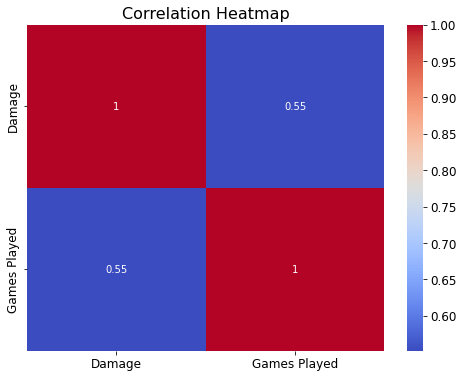

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(all_legends_df[['Damage','Kills','Wins','Games Played']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 6. Analysis by Legend Categories

In [13]:
# Remove commas and convert to integers for the 'Kills' column
all_legends_df['Kills'] = all_legends_df['Kills'].str.replace(',', '', regex=False).astype(int)

# Now run your aggregation
category_stats = all_legends_df.groupby('Legend_Category').agg({
    'Damage': ['mean', 'median', 'std'],
    'Kills': ['mean', 'median', 'std'],
    'Wins': ['mean', 'median', 'std'],
    'Games Played': ['mean', 'median', 'std']
})

print("Detailed Statistical Summary per Category:\n")
display(category_stats)



Detailed Statistical Summary per Category:



Damage                                   Kills  \
                         mean      median           std          mean   
Legend_Category                                                         
Assault          7.778038e+06   4980740.0  2.725621e+07  25777.314800   
Controller       8.323707e+06   8049158.5  5.357939e+06  28825.797500   
Recon            7.146502e+06   6616384.5  4.935110e+06  24203.651500   
Skirmisher       1.264033e+07  12464246.0  9.206658e+06  48118.513429   
Support          9.498046e+06   9267039.5  6.635491e+06  36009.520000   

                                             Wins                       \
                  median           std       mean  median          std   
Legend_Category                                                          
Assault          15558.5  23897.659272  1668.0315   868.0  1697.568358   
Controller       25520.0  20556.083284  1495.0725  1285.5  1356.193990   
Recon            20899.5  18533.477194  1356.5595  1114.5  1359.639051   
Skirmisher       47183.5  30688.149808  3078.2830  2841.0  1681.392034   
Support          31794.0  26446.045919  3010.5725  2443.5  1895.651196   

                Games Played                       
                        mean  median          std  
Legend_Category                                    
Assault          5072.487200  3299.0  4668.216773  
Controller       6158.119000  5529.0  4768.778605  
Recon            5575.521000  4165.5  4524.001195  
Skirmisher       9722.150857  9449.0  6555.645361  
Support          7135.628667  6424.5  5469.700819

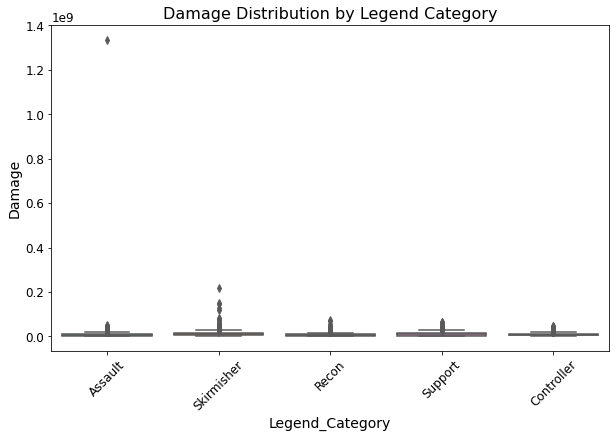

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x432 with 0 Axes>

In [ ]:
metrics = ['Damage', 'Kills', 'Wins', 'Games Played']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Legend_Category', y=metric, data=all_legends_df, palette='Set2')
    plt.title(f'{metric} Distribution by Legend Category')
    plt.xticks(rotation=45)
    plt.show()

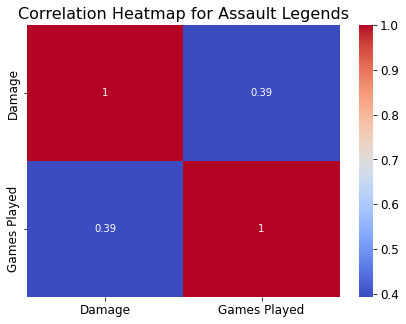

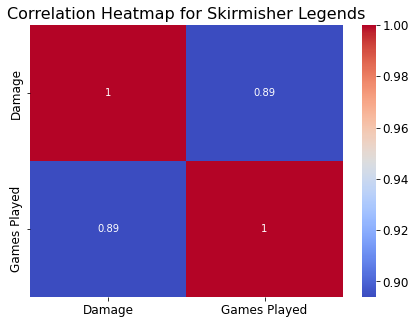

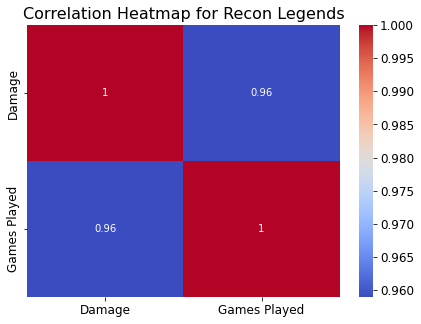

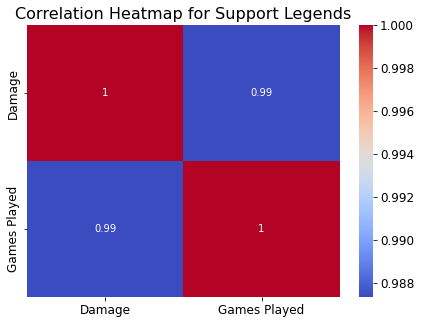

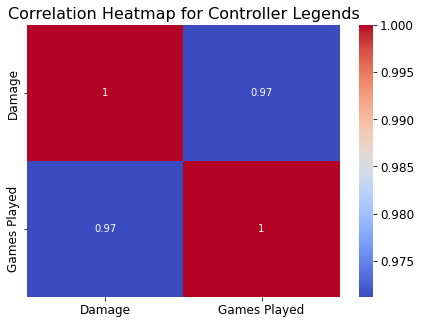

In [ ]:
for category in all_legends_df['Legend_Category'].unique():
    plt.figure(figsize=(7,5))
    subset = all_legends_df[all_legends_df['Legend_Category'] == category]
    sns.heatmap(subset[['Damage','Kills','Wins','Games Played']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {category} Legends')
    plt.show()
